# **Supervised Machine Learning: Regression**

## **Objective of the Analysis: Clearly state what the analysis aims to achieve.**

The objective of this analysis is threefold:
1. Build a model capable of predicting user ratings on various Anime shows with some degree of accuracy.
2. Using that model's assigned coefficients, identify the key features and variables that have the highest effect on user ratings.
3. Draw conclusions from those insights gained from feature importances to outline a plan to further increase our model's accuracy with future enhancement.

## **Data Summary: Describe the dataset size, key variables, and target variable.**

1. The original size of the dataset, prior to data cleaning, was 12,101 rows across 44 columns. The size of the dataset after cleaning techniques were applied to remove missing values and drop redundant or unnecessary data, but before applying dummy variables, was ultimately **7465 rows across 41 columns**.
2. Key variables within the dataset included:
  * **Media type** - the format of the publication
  * **Primary studio** - primary production studio
  * **Duration** - duration of the episode in minutes
  * **Watching** - number of users currently watching the episode
  * **WantWatch** - number of users that want to watch the episode
  * **Dropped** - the number of users that did not finish watching the episode
3. Our target variable was **Rating** - the average user rating on a scale of 0 to 5.

## **Model Comparison: Compare variations of linear regression and select the best one.**

We built a total of 5 models, all with very similar performance, but ulimately chose Ridge Regression with Cross Validation on log transformed variables as our final model.

The models' R-squared test performance was as follows:
| **Model** | **Test R-squared** | **Test RMSE** |
| --------- | ------------------ | ------------- |
| Linear Regression on original values | 0.516978 | 0.588642 |
| Linear Regression with log values | 0.644501 | 0.504995 |
| **from this point on all models used log** | **values** | |
| Lasso Cross Validation | 0.644556 | 0.504956 |
| Ridge Cross Validation | 0.644704 | 0.504851 |
| Elastic Net Cross Validation | 0.644655 | 0.504885 |

*For more information on model performance, please see the bottom of the notebook.*



## **Key Findings: Present meaningful insights that align with the objective.**

1. **Completion behavior emerged as the most significant predictor of ratings.**
* The variable “Dropped”—indicating users who did not finish an episode—showed the strongest negative relationship with ratings, with a coefficient of –0.51.

2. **Social dynamics may influence user sentiment.**
* The variables “Watching” (users currently viewing an episode) and “WantWatch” (users expressing interest in viewing) were the next most influential predictors, both positively associated with ratings (+0.32 and +0.34, respectively). This suggests potential effects of peer engagement or trend participation (“bandwagon” behavior).

3. **Production studio and media type also play meaningful roles.**
* Notably, six of the top ten most influential features were tied to Primary Studio or Media Type. TMS Entertainment was the top-performing studio (+0.19), while OLM and DLE were associated with lower ratings (–0.23 to –0.28). Among media types, Music Video had the strongest positive impact (+0.23), whereas TV showed the most negative influence (–0.23).

4. **Longer content correlates with higher ratings.**
* The “Duration” variable carried a positive coefficient of +0.26, indicating that, within this dataset, longer episodes tend to receive higher user ratings.

## **Limitations and Next Steps: Identify model flaws and outline future improvements**

1. **Model performance leaves room for improvement.**
* Current accuracy deviates by approximately 0.5 points on ratings, with an R² of 64%, indicating moderate explanatory power but opportunity for refinement.

2. **Tag-related features show redundancy.**
* The multiple variables within the “tag” category - representing episode content - exhibited highly similar coefficients. Consolidating tags with comparable thematic content or coefficients could enhance both model accuracy and computational efficiency.

3. **Feature transformations continue to show promise.**
* Log transformations improved model performance significantly; however, additional experimentation with polynomial, square root, or cube root transformations may further strengthen linear relationships between predictors and ratings.

4. **Advanced modeling techniques may yield superior results.**
* While this analysis was limited to linear regression models, more sophisticated approaches (such as neural networks or nonlinear classification algorithms) may better capture complex patterns and manage the high degree of noise and outliers present in the data.

# **Begin Notebook**

### Importing Libraries and the Dataset

In [76]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Reading the data into a dataframe
data = pd.read_csv('/content/drive/MyDrive/Datasets/anime_data.csv')

In [79]:
# Making a copy of the data
df = data.copy()

### Data Overview

**Data Dictionary**

- title - the title of anime
- description - the synopsis of the plot
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- sznOfRelease - the season of release (Winter, Spring, Fall)
- years_running - number of years the anime ran/is running
- studio_primary - primary studio of production
- studios_colab - whether there was a collaboration between studios to produce the anime
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_Based_on_a_Manga - whether the anime is based on a manga
- tag_Comedy - whether the anime is of Comedy genre
- tag_Action - whether the anime is of Action genre
- tag_Fantasy - whether the anime is of Fantasy genre
- tag_Sci_Fi - whether the anime is of Sci-Fi genre
- tag_Shounen - whether the anime has a tag Shounen
- tag_Original_Work - whether the anime is an original work
- tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
- tag_Drama - whether the anime is of Drama genre
- tag_Adventure - whether the anime is of Adventure genre
- tag_Family_Friendly - whether the anime is family-friendly
- tag_Short_Episodes - whether the anime has short episodes
- tag_School_Life - whether the anime is regarding school life
- tag_Romance - whether the anime is of Romance genre
- tag_Shorts - whether the anime has a tag Shorts
- tag_Slice_of_Life - whether the anime has a tag Slice of Life
- tag_Seinen - whether the anime has a tag Seinen
- tag_Supernatural - whether the anime has a tag Supernatural
- tag_Magic - whether the anime has a tag Magic
- tag_Animal_Protagonists - whether the anime has animal protagonists
- tag_Ecchi - whether the anime has a tag Ecchi
- tag_Mecha - whether the anime has a tag Mecha
- tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
- tag_CG_Animation - whether the anime has a tag CG Animation
- tag_Superpowers - whether the anime has a tag Superpowers
- tag_Others - whether the anime has other tags
- tag_is_missing - whether tag is missing or not

In [80]:
# Displaying the first 5 rows
df.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,...,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,...,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,...,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,...,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Understanding the shape of the data
df.shape

(12101, 44)

* Our dataset contains 12101 rows in 44 columns.

In [82]:
# Reviewing the data types and null count in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

* Our data contains 5 object variables, 1 boolean variable, and 38 numerical variables (3 floats and 35 integers).

In [83]:
df.describe(exclude=['object', 'bool'])

,eps,duration,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
count,12101.000000,7465.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,...,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000,12101.000000
mean,13.393356,24.230141,0.283200,0.051649,0.115362,2862.605694,256.334435,1203.681431,151.568383,2.949037,...,0.070903,0.064292,0.060326,0.057433,0.054541,0.053384,0.050079,0.044624,0.090654,0.025866
std,57.925097,31.468171,1.152234,0.221326,0.319472,7724.347024,1380.840902,2294.327380,493.931710,0.827385,...,0.256674,0.245283,0.238099,0.232678,0.227091,0.224807,0.218116,0.206486,0.287128,0.158741
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,0.000000,0.000000,0.000000,55.000000,2.000000,49.000000,3.000000,2.304000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,8.000000,0.000000,0.000000,0.000000,341.000000,14.000000,296.000000,12.000000,2.965000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,30.000000,0.000000,0.000000,0.000000,2026.000000,100.000000,1275.000000,65.000000,3.616000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2527.000000,163.000000,51.000000,1.000000,1.000000,161567.000000,74537.000000,28541.000000,19481.000000,4.702000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Our episode count, watched, watching, and wantWatch all have wide ranges.
* 50% of the anime have a runtime of 8 minutes or less.
* 75% of the anime have run for less than 1 year and contain no content warnings.
* Ratings vary between 0.84 and 4.7, which suggest a 5-star rating scale.
* All of our tag variables are binomial suggesting this data has been cleaned using get.dummies or encoded prior.

In [84]:
# Displaying the statistical summary for the categorical variables
df.describe(include='object')

,title,description,mediaType,sznOfRelease,studio_primary
count,12101,7633,12101,12101,12101
unique,12101,7572,9,5,22
top,Ultra B: Black Hole kara no Dokusaisha BB!!,"In 19th century Belgium, in the Flanders count...",TV,is_missing,Others
freq,1,3,3993,8554,4340


* Titles are unique to each anime, and will be dropped.
* Description is very text heavy, and will be dropped for simplification.
* Most common media type is TV.
* sznOfRelease shows 'is_missing' for 70% of the data. Since we can't obtain this information in a timely fashion, it will also be dropped.

In [85]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

* We have one duplicated value.

In [86]:
# Checking for missing values
df.isnull().sum()

,0
title,0
description,4468
mediaType,0
eps,0
duration,4636
ongoing,0
sznOfRelease,0
years_running,0
studio_primary,0
studios_colab,0


In [87]:
# Dropping the title, description, and sznOfRelease columns
df.drop(['title', 'description', 'sznOfRelease'], axis=1, inplace=True)

In [88]:
# Isolating the duplicated rows
df[df.duplicated()]

,mediaType,eps,duration,ongoing,years_running,studio_primary,studios_colab,contentWarn,watched,watching,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
10982,TV,20,NaN,False,0,is_missing,0,0,12.0,0,...,0,0,1,0,0,0,1,0,0,0


In [89]:
# Dropping row 10982 from the dataset and resetting the index
df.drop(10982, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

* We're missing about 1/3 of the durations. We'll drop the remaining missing values from the dataset.

In [90]:
# Dropping the rows with missing values
df.dropna(inplace=True)
df.shape

(7465, 41)

## EDA

### Utility Functions

In [16]:
def histogram_boxplot(data, feature, figsize=(8, 5), kde=True, title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (8, 5))
    kde: whether to show the density curve (default False)
    title: optional title for the plot
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="skyblue"
    )

    # Add mean and median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist2.legend()

    # Add title if provided, otherwise create default title
    if title is None:
        title = f"Distribution of {feature}"
    f2.suptitle(title, fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        legend=False,
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(f"Percentage by {feature}", fontsize=20)
    plt.show()  # show the plot

### Numerical Visualization

#### Binomial Variables

* First we'll look at the binomial variables

In [18]:
# Checking which numerical variables are binomnial
binoms = df.columns[df.nunique() == 2]
binoms

Index(['ongoing', 'studios_colab', 'contentWarn', 'tag_Based_on_a_Manga',
       'tag_Comedy', 'tag_Action', 'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen',
       'tag_Original_Work', 'tag_Non_Human_Protagonists', 'tag_Drama',
       'tag_Adventure', 'tag_Family_Friendly', 'tag_Short_Episodes',
       'tag_School_Life', 'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life',
       'tag_Seinen', 'tag_Supernatural', 'tag_Magic',
       'tag_Animal_Protagonists', 'tag_Ecchi', 'tag_Mecha',
       'tag_Based_on_a_Light_Novel', 'tag_CG_Animation', 'tag_Superpowers',
       'tag_Others', 'tag_missing'],
      dtype='object')

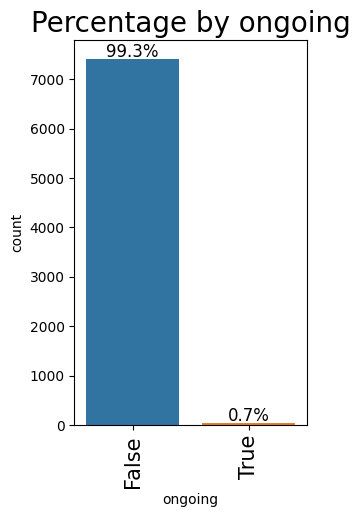

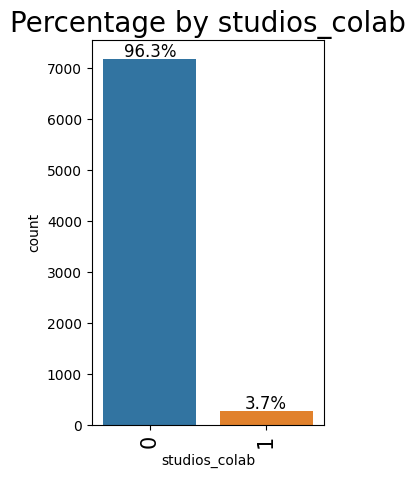

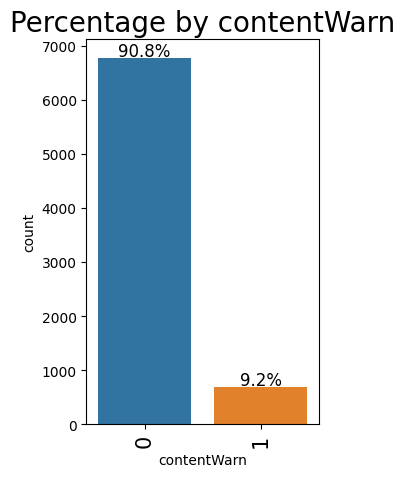

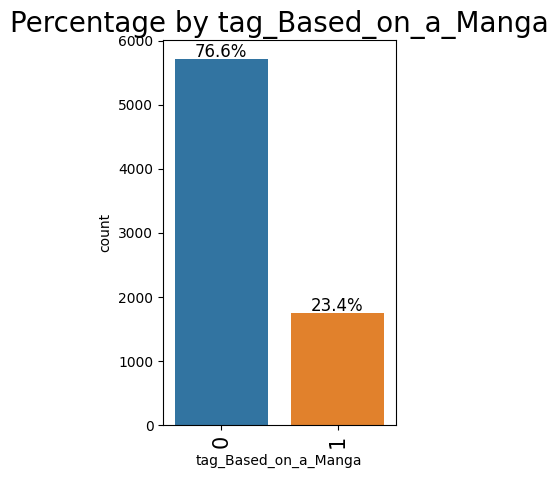

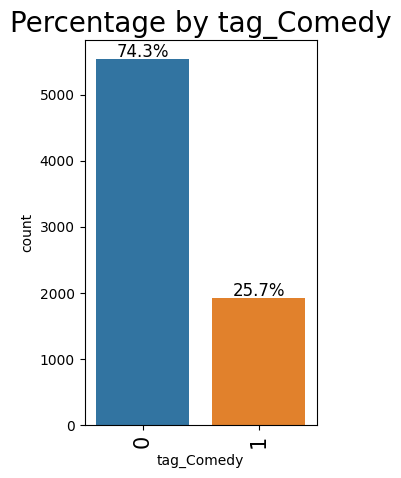

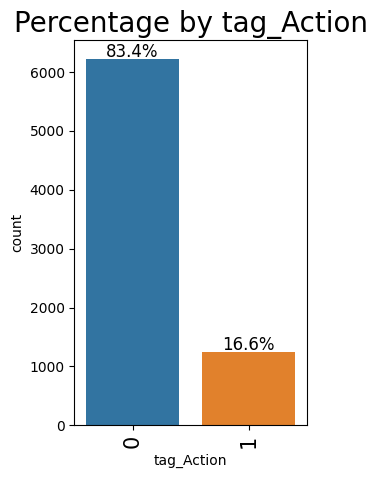

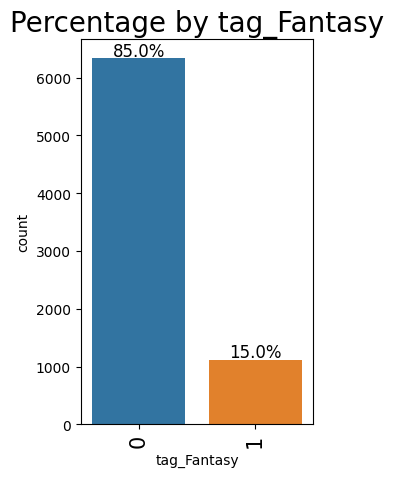

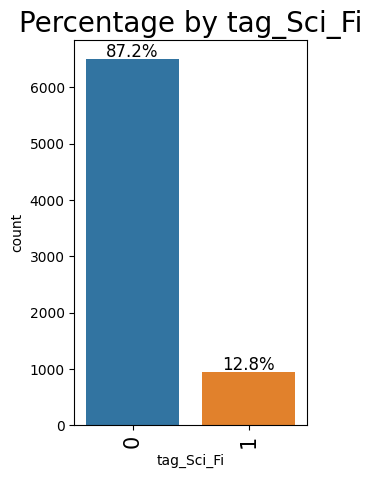

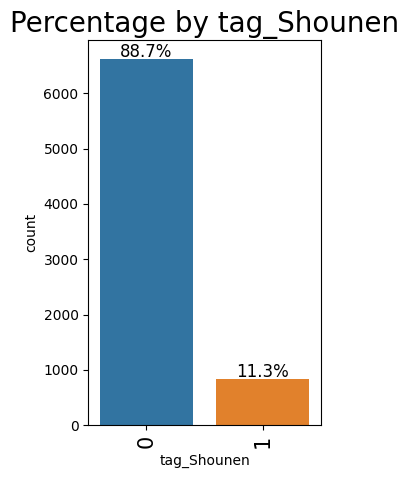

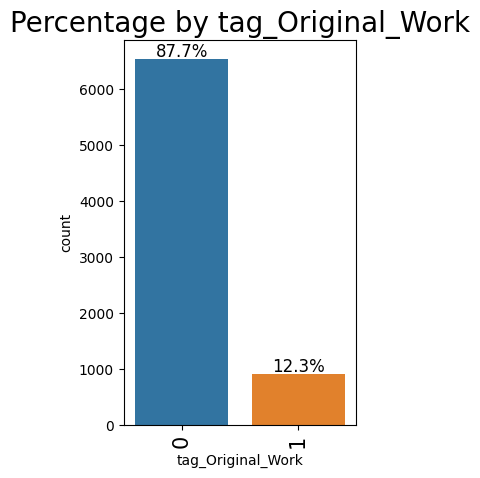

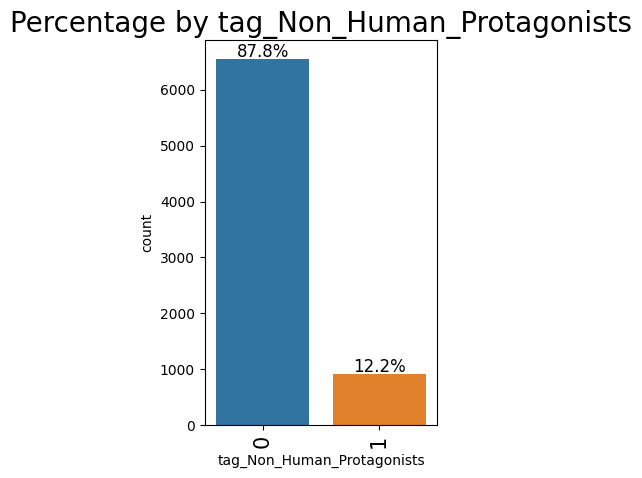

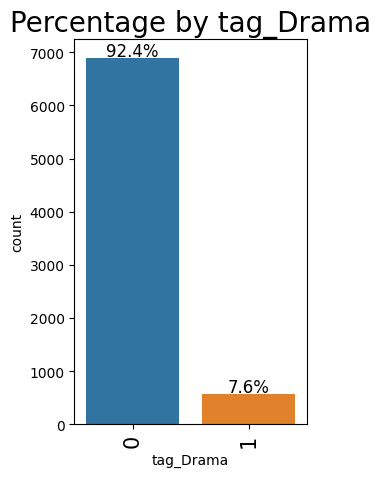

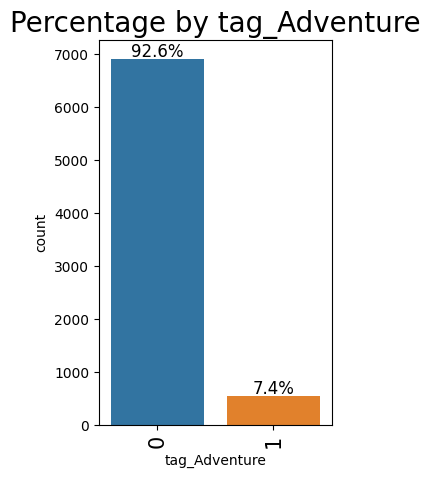

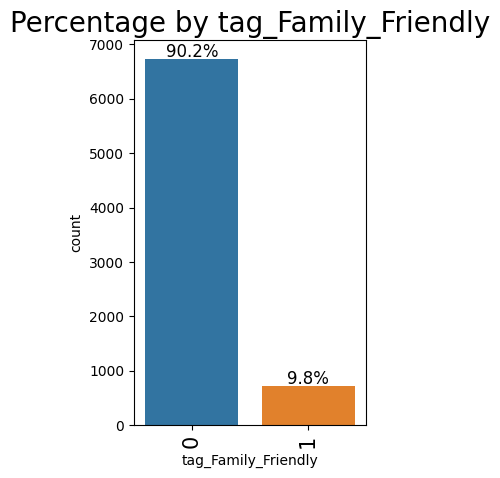

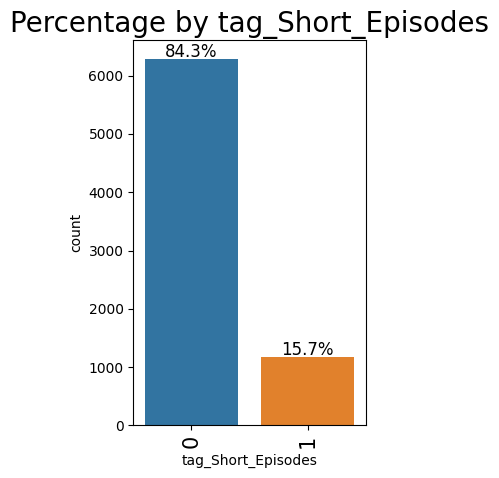

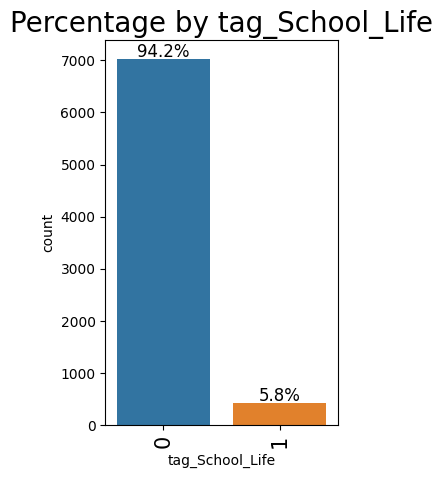

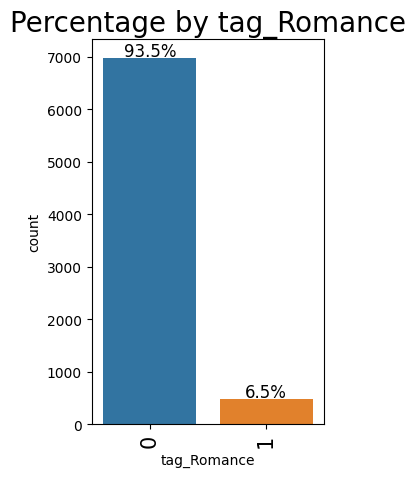

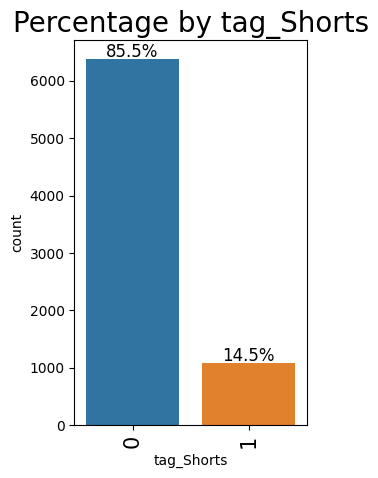

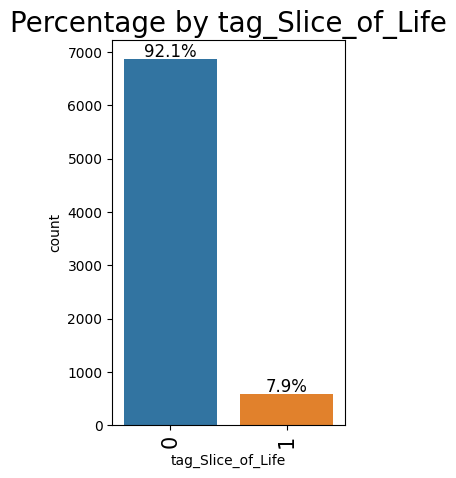

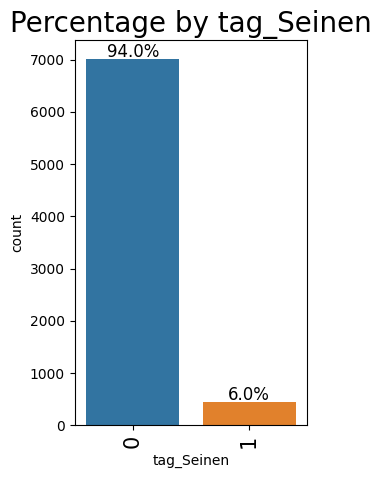

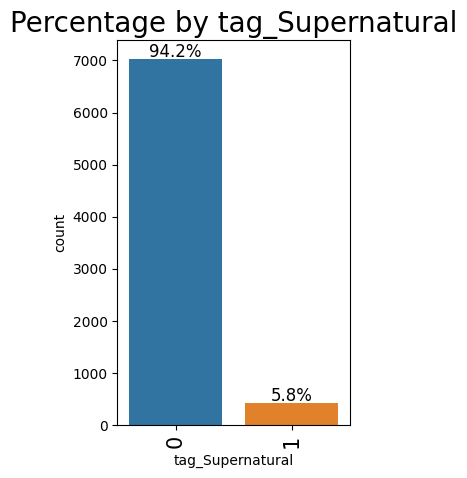

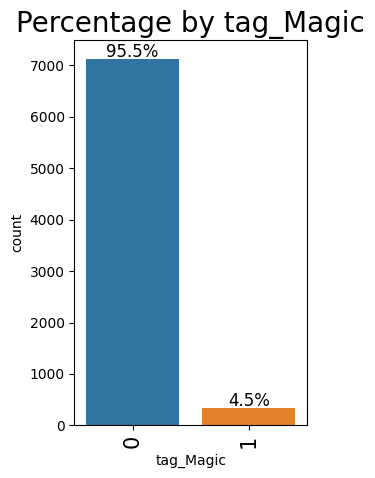

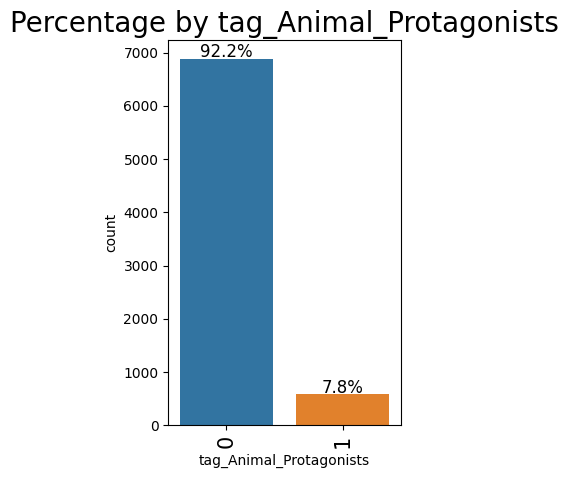

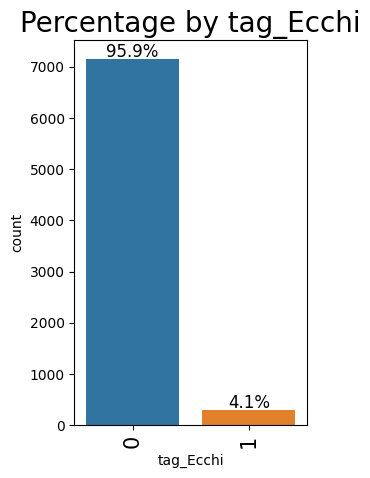

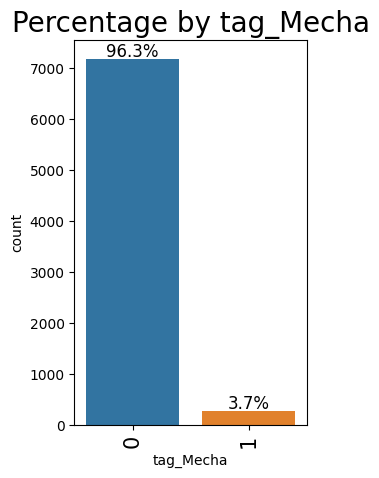

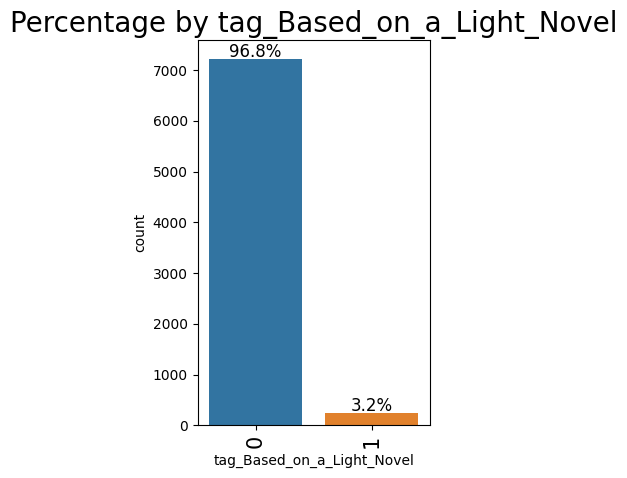

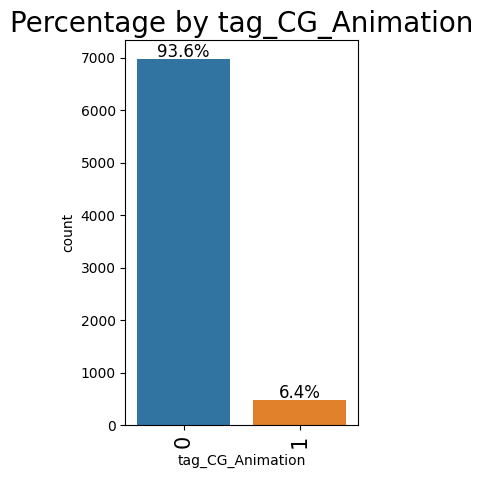

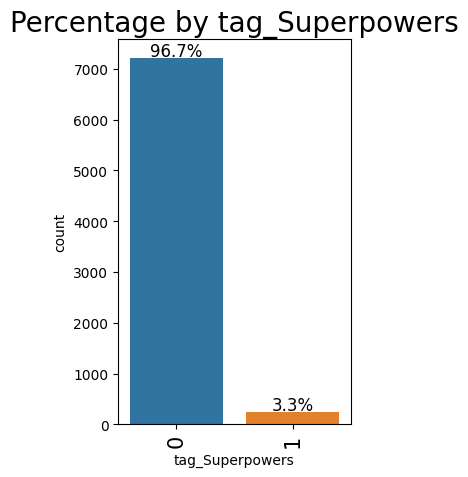

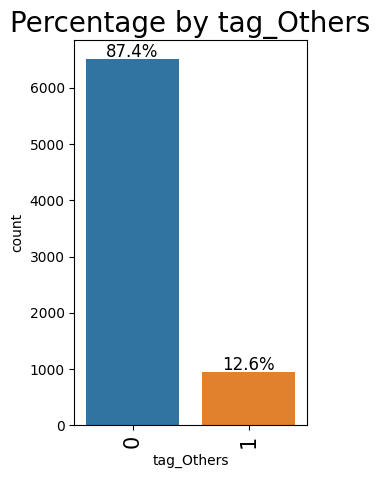

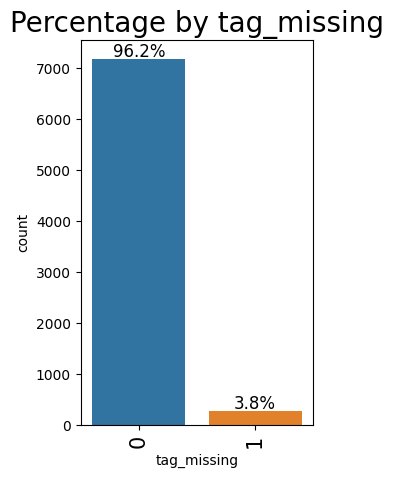

In [19]:
# Looping through the binoms and creating labeled barplots
for col in binoms:
    labeled_barplot(df, col)

#### Episodes

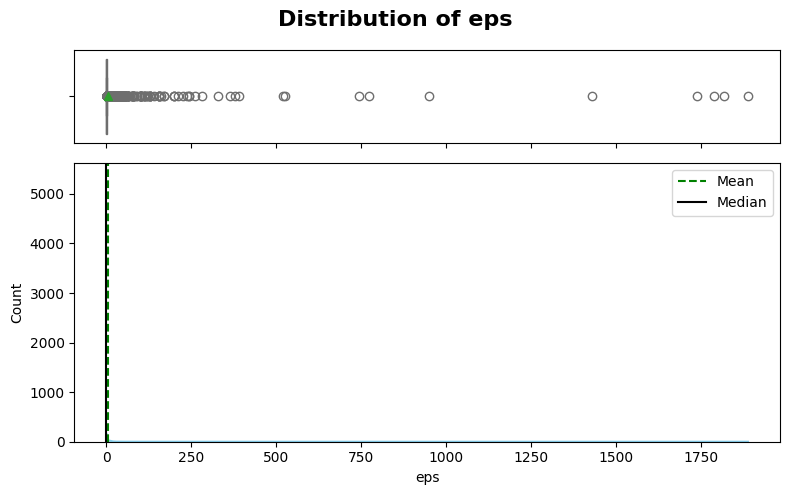

In [20]:
# Visualizing the distribution of eps
histogram_boxplot(df, 'eps')

* This variable is incredibly right-skewed.

#### Duration

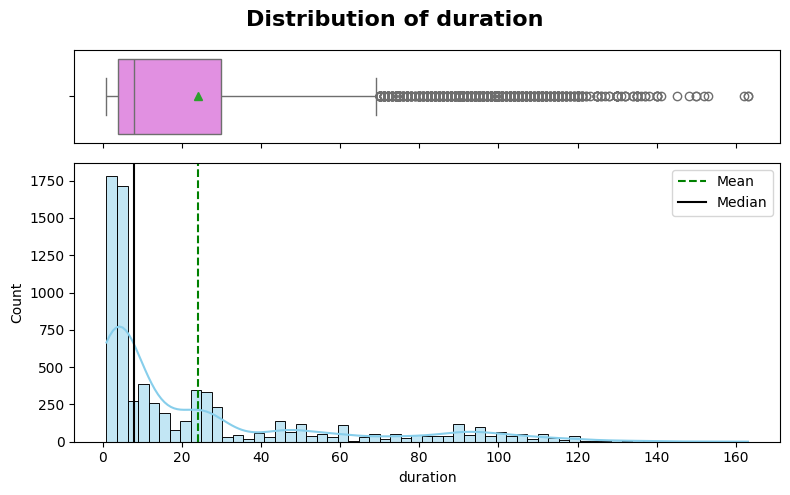

In [21]:
# Visualizing the distribution of duration
histogram_boxplot(df, 'duration')

* Duration is extremely right-skewed as well.

#### Years Running

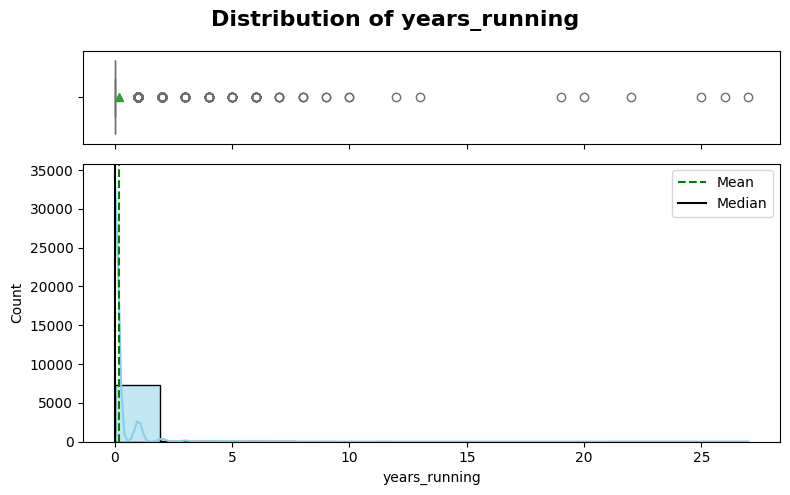

In [22]:
# Plotting the distribution of Years Running
histogram_boxplot(df, 'years_running')

* Incredibly right-skewed with multiple outliers.

#### Watched

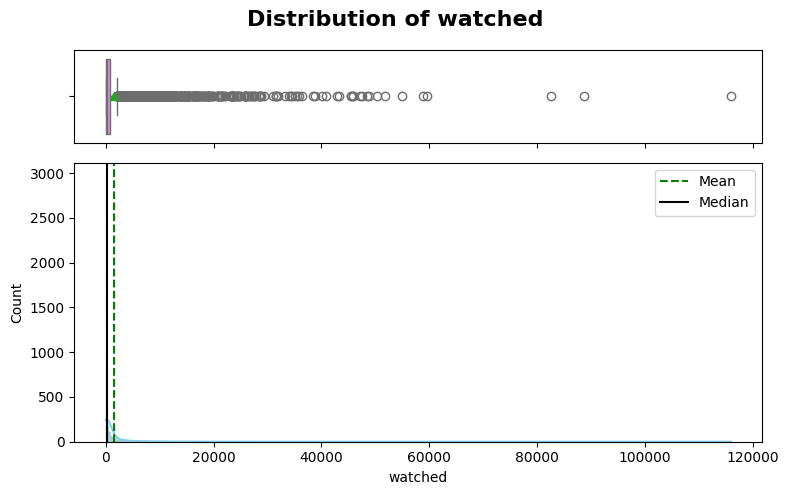

In [23]:
# Visualizing the distribution of Watched
histogram_boxplot(df, 'watched')

* Again, very right-skewed.

#### Watching

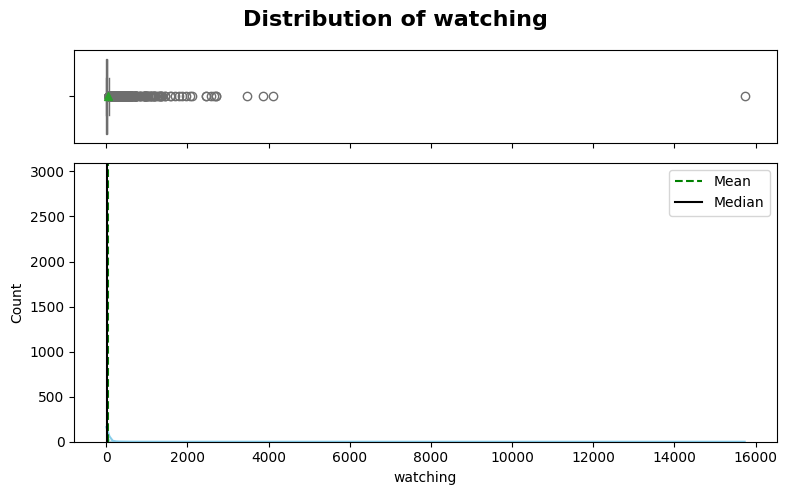

In [24]:
# Visualizing the distribution of Watching
histogram_boxplot(df, 'watching')

* Super right-skewed with muliple outliers

#### WantWatch

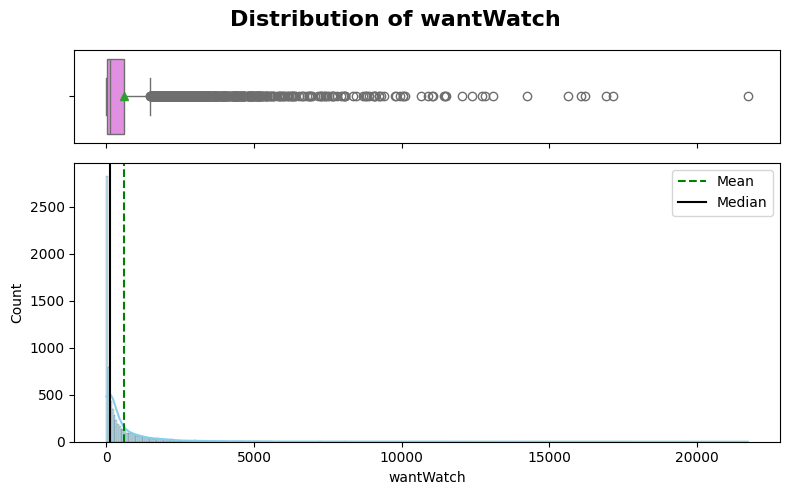

In [25]:
# Visualizing the distribution of wantWatch
histogram_boxplot(df, 'wantWatch')

* Super right skewed with multiple outliers.

#### Dropped

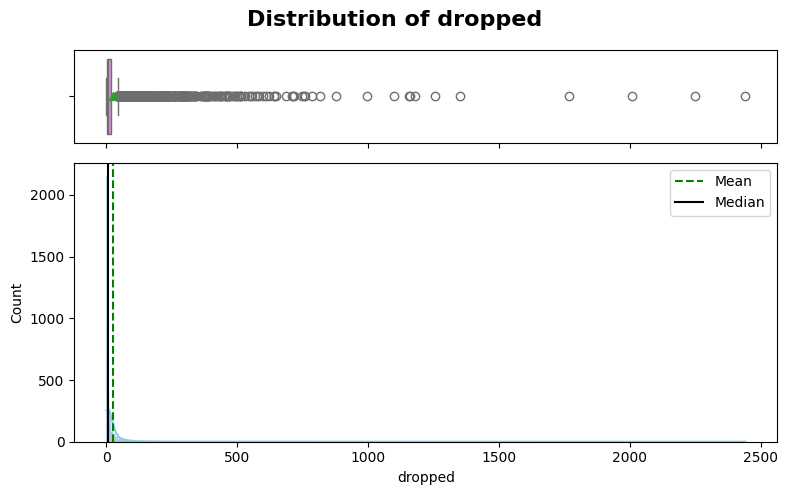

In [26]:
# Visualizing the distribution of dropped
histogram_boxplot(df, 'dropped')

* What do you know?!? Right skewed with multiple outliers.

#### Votes

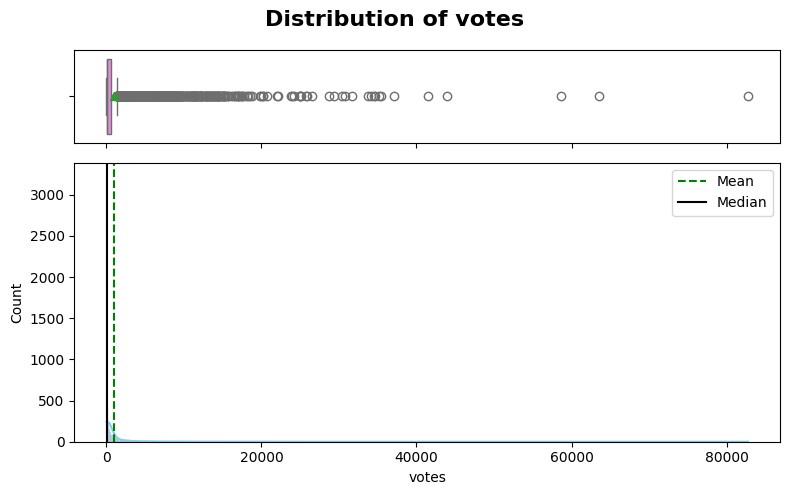

In [27]:
# Visualizing the distribution of votes
histogram_boxplot(df, 'votes')

* Right skewed with multiple outliers.

#### Log Transforming Select Variables

* Since all of the above - non-binary variables - are highly right skewed, we'll create a separate dataframe in which these variables are log transformed to compare and experiment with.

In [28]:
# Creating a list of the variables to transform
log_vars = ['eps', 'duration', 'years_running', 'watched', 'watching', 'wantWatch', 'dropped', 'votes']

# Creating a copy of the dataframe
df_log = df.copy()

# Log transforming the variables
for var in log_vars:
    df_log[var] = np.log1p(df_log[var])

#### Categorical Visualizations

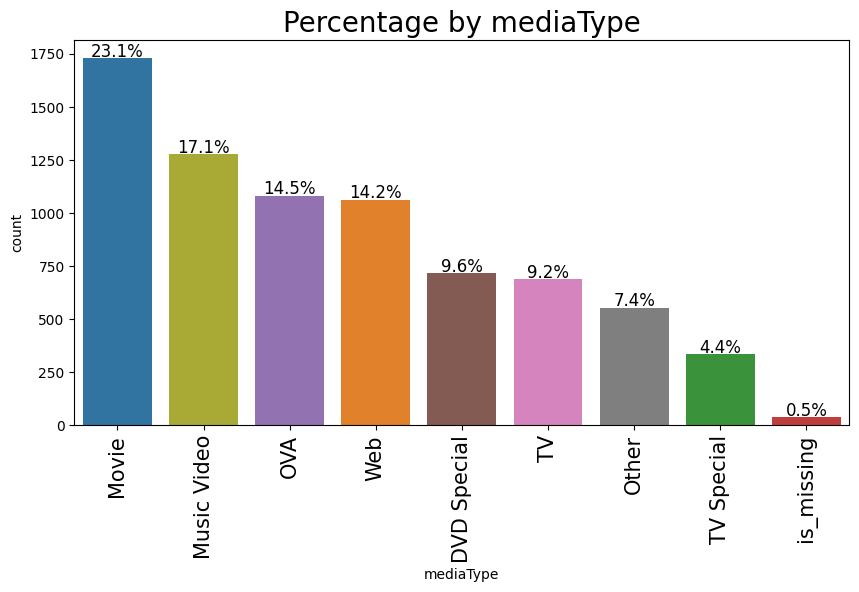

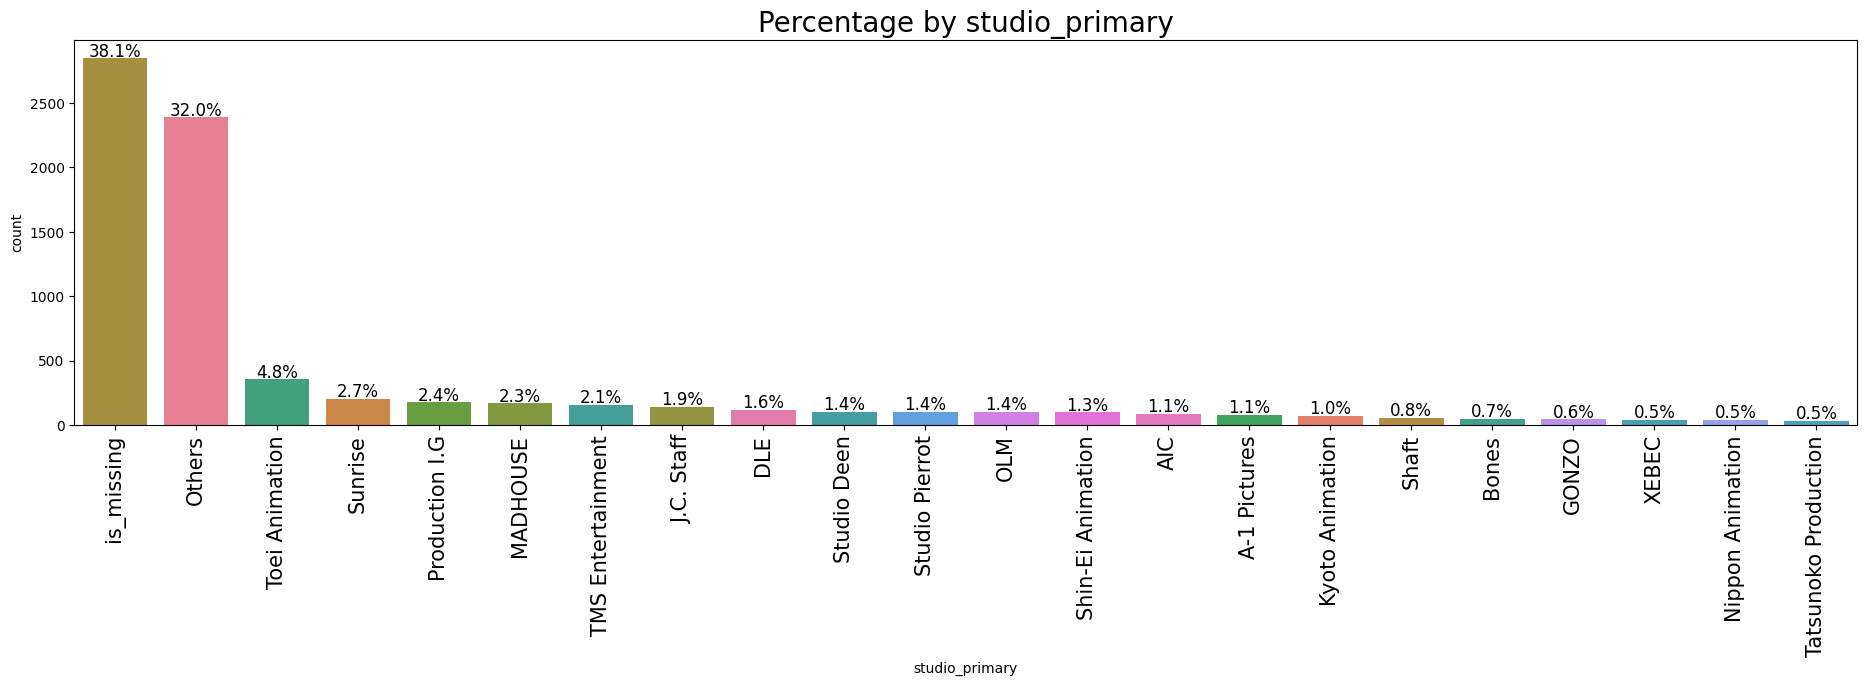

In [29]:
# Visualizing the distributions for the categorical variables
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    labeled_barplot(df, feature, perc=True)

#### Bivariate Analysis

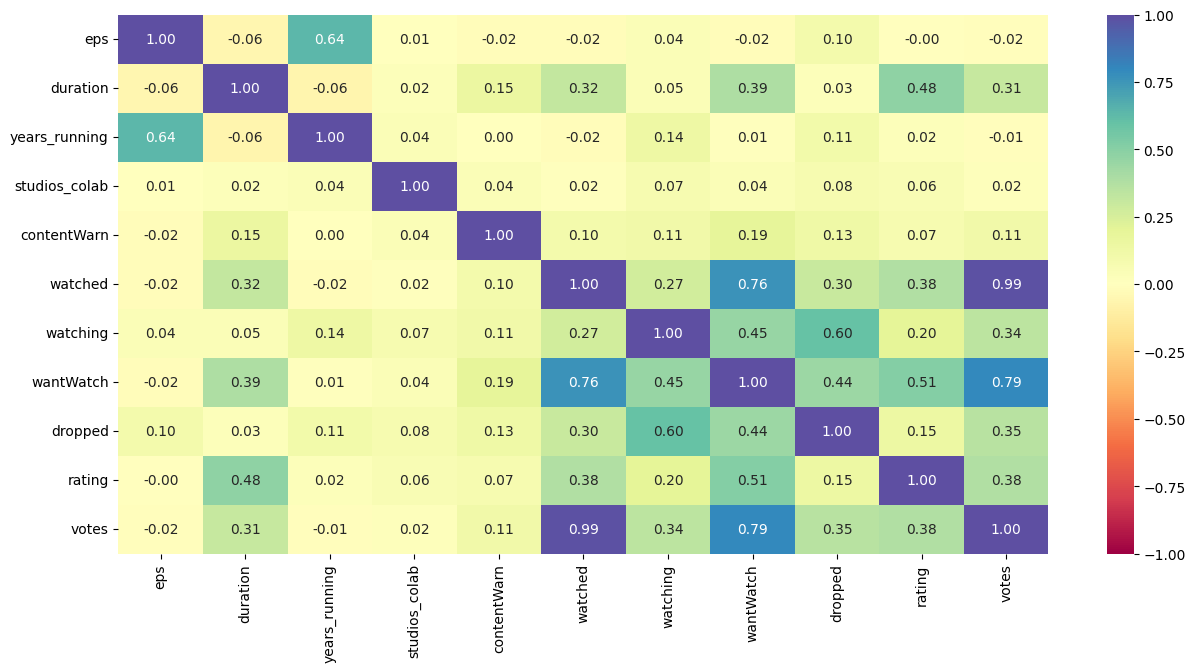

In [30]:
# Plotting the correlation heatmap for numerical variables from our original dataset
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_cols = [item for item in numerical_features if 'tag' not in item]
plt.figure(figsize=(15, 7))
sns.heatmap(df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

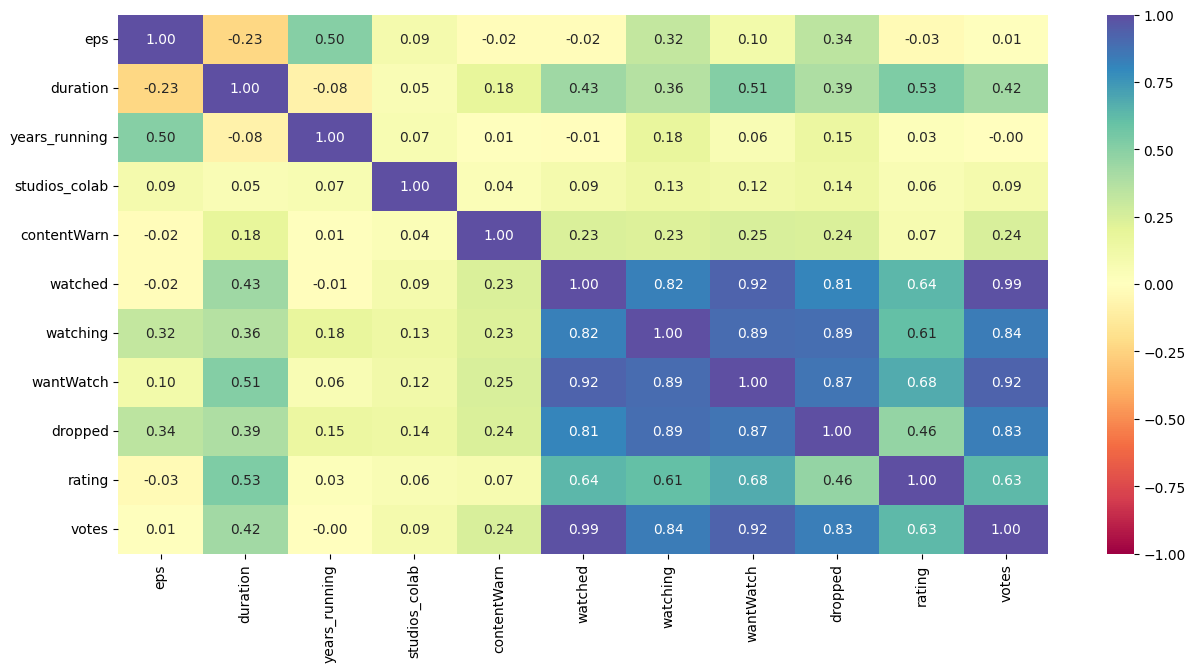

In [31]:
# Plotting the correlation heatmap for numerical variables from our original dataset
numerical_features_log = df_log.select_dtypes(include=['int64', 'float64']).columns
corr_cols_log = [item for item in numerical_features_log if 'tag' not in item]
plt.figure(figsize=(15, 7))
sns.heatmap(df_log[corr_cols_log].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preprocessing

In [32]:
# Importing standard scaling
from sklearn.preprocessing import StandardScaler

In [33]:
# Splitting into train and test
X = df.drop('rating', axis=1)
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X.shape

(7465, 40)

In [75]:
y.shape

(7465,)

In [34]:
# Getting dummy columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [35]:
# Scaling the numeric variables
numerical_features = numerical_features.drop('rating')
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

## Model Building

#### Base Linear Regression

In [38]:
# Initiating our base Linear Regression Model
lr = LinearRegression()

# Fitting lr model to the training data
lr.fit(X_train, y_train)

# Making predictions
y_pred = np.clip(lr.predict(X_test), 0, 5)

# Printing the coefficients
print('Coefficients:', lr.coef_)

# Printing the intercept
print('Intercept:', lr.intercept_)

# Printing the training score
lr_r2_train = r2_score(y_train, lr.predict(X_train))
print('Training R-squared score:', lr_r2_train)

# Printing the R-squared score
lr_r2_test = r2_score(y_test, y_pred)
print('Test R-squared score:', lr_r2_test)

# Printing the training RMSE
lr_rmse_train = np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))
print('Training RMSE:', lr_rmse_train)

# Printing the RMSE
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', lr_rmse_train)

Coefficients: [ 1.21344281e-02  1.69809809e-01  5.77701691e-01  1.33090705e-02
  4.60743762e-03 -6.06730179e-02  3.82861572e-01  3.95029501e-02
  2.92130247e-01 -5.49589581e-02 -4.26373653e-01  7.95094801e-02
  9.32643512e-03  2.24041957e-02  4.80157325e-02  1.63345654e-02
  5.20748595e-02 -7.00886567e-03  2.20588819e-02  7.19820802e-02
  3.37159437e-05 -2.58857171e-02 -3.67052782e-02  3.04985934e-02
  2.43938147e-02 -5.94264130e-02  5.93139032e-02  3.38226083e-02
  4.25705185e-02  1.36839871e-02 -2.88426703e-02 -3.02052568e-02
  5.68586011e-03  5.30924342e-02 -1.79431385e-04 -3.36704107e-03
  1.30866546e-02 -6.41469800e-03 -2.39007915e-01 -6.50374860e-02
 -2.59536439e-01 -1.68984555e-01 -3.48365236e-01 -1.24532374e-01
 -1.75048185e-01 -1.16444544e-01 -3.76585921e-02  2.24759394e-01
 -6.61888980e-01  7.46559874e-02 -7.27027829e-02  6.51192019e-02
  8.65835517e-02  1.49209342e-01  2.72845775e-02 -1.98892171e-02
  2.52967804e-01  2.04349899e-01  5.15514725e-02  3.24693803e-01
 -4.3546170

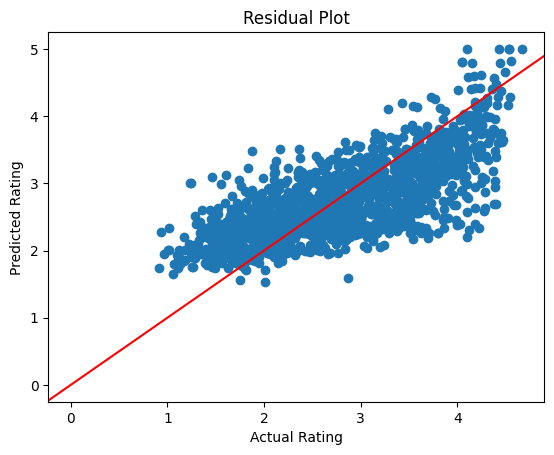

In [39]:
# Plotting the residuals
plt.scatter(y_test, y_pred)
plt.axline([0, 0], slope=1, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Residual Plot')
plt.show()

* Not a bad start - who am I kidding, 50% is horrible. Let's try with df_log

In [40]:
# Splitting into train and test
X_log = df_log.drop('rating', axis=1)
y_log = df_log['rating']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [41]:
# Getting dummy columns
X_train_log = pd.get_dummies(X_train_log, drop_first=True)
X_test_log = pd.get_dummies(X_test_log, drop_first=True)

In [42]:
# Scaling the numeric variables
scaler = StandardScaler()
X_train_log[numerical_features] = scaler.fit_transform(X_train_log[numerical_features])
X_test_log[numerical_features] = scaler.transform(X_test_log[numerical_features])

In [43]:
# Initiating our base Linear Regression Model
lr_log = LinearRegression()

# Fitting lr model to the training data
lr_log.fit(X_train_log, y_train_log)

# Making predictions
y_pred_log = np.clip(lr_log.predict(X_test_log), 0, 5)

# Printing the coefficients
print('Coefficients:', lr_log.coef_)

# Printing the intercept
print('Intercept:', lr_log.intercept_)

# Printing the training R-squared score
lr_log_r2_train = r2_score(y_train_log, lr_log.predict(X_train_log))
print('Training R-squared score:', lr_log_r2_train)

# Printing the testing R-squared score
lr_log_r2_test = r2_score(y_test_log, y_pred_log)
print('Test R-squared score:', lr_log_r2_test)

# Printing the training RMSE score
lr_log_rmse_train = np.sqrt(mean_squared_error(y_train_log, lr_log.predict(X_train_log)))
print('Training RMSE:', lr_log_rmse_train)

# Printing the testing RMSE
lr_log_rmse_test = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
print('Test RMSE:', lr_log_rmse_test)

Coefficients: [ 1.33244448e-01  2.72824920e-01  1.92370731e-01  7.11070332e-03
 -5.40994085e-04 -6.99281411e-02  8.51867362e-02  3.27476593e-01
  3.54191493e-01 -5.17108002e-01  1.55008048e-01  3.56676473e-02
  1.00688529e-02 -8.13116373e-03  1.60553699e-02 -2.62171714e-03
  2.54953252e-02 -2.04384987e-02  1.70084715e-02  5.30551711e-02
  3.12056434e-03 -2.81154275e-04 -3.65151025e-02  7.22005279e-03
 -1.28994458e-03 -1.26251966e-02  4.30030746e-02  1.33735862e-02
  2.09782029e-02 -1.90778247e-03 -1.35467647e-02 -5.31499761e-02
  7.99299007e-03  1.62677201e-02 -1.10269087e-02 -1.33394693e-02
  7.52774228e-03 -1.38092126e-03 -8.15984282e-02  2.40002128e-01
 -1.79650653e-01  7.69011769e-02 -2.48226146e-01 -4.97950490e-02
  1.23934055e-02  2.77834909e-02 -1.34692671e-01  1.38437871e-01
 -2.97249845e-01 -5.57674214e-02 -1.21957016e-01  3.09442117e-02
  8.13070944e-02  2.37796536e-01 -2.53528902e-01 -3.90268855e-02
  1.30175655e-01  1.37937865e-01  1.78632037e-01  1.30142837e-01
 -2.8042578

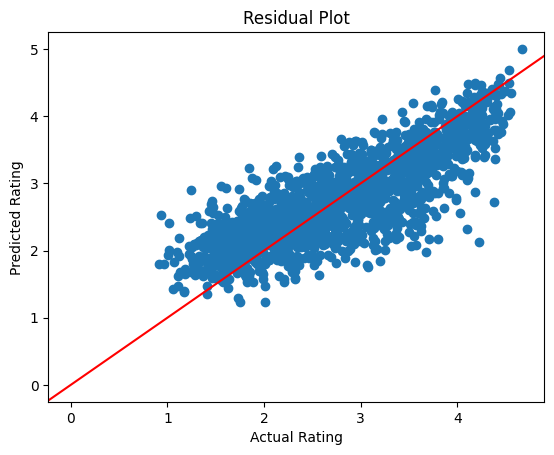

In [44]:
# Plotting the residuals
plt.scatter(y_test_log, y_pred_log)
plt.axline([0, 0], slope=1, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Residual Plot')
plt.show()

* NICE! We'll take a 13% boost in r2_score. Let's continue with the df_log for our further models.

#### LassoCV Regression

In [45]:
# Setting the alphas
alphas = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 5]

# Fitting the Lasso regression model
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=42)
lasso_cv.fit(X_train_log, y_train_log)

# Making predictions
y_lassocv_pred = np.clip(lasso_cv.predict(X_test_log),0 , 5)

# Printing the coefficients
print('Coefficients:', lasso_cv.coef_)

# Printing the intercept
print('Intercept:', lasso_cv.intercept_)

# Printing the training R-squared score
lasso_cv_r2_train = r2_score(y_train_log, lasso_cv.predict(X_train_log))
print('Training R-squared score:', lasso_cv_r2_train)

# Printing the testing R-squared score
lasso_cv_r2_test = r2_score(y_test_log, y_lassocv_pred)
print('Test R-squared score:', lasso_cv_r2_test)

# Printing the training RMSE score
lasso_cv_rmse_train = np.sqrt(mean_squared_error(y_train_log, lasso_cv.predict(X_train_log)))
print('Training RMSE:', lasso_cv_rmse_train)

# Printing the testing RMSE score
lasso_cv_rmse_test = np.sqrt(mean_squared_error(y_test_log, y_lassocv_pred))
print('Test RMSE:', lasso_cv_rmse_test)

Coefficients: [ 1.32683030e-01  2.71858347e-01  1.74953712e-01  7.22057570e-03
 -2.82617397e-04 -6.97882445e-02  8.86836911e-02  3.28631313e-01
  3.53343591e-01 -5.16320335e-01  1.50681700e-01  3.55473608e-02
  1.00552442e-02 -8.14227167e-03  1.57724763e-02 -2.27106402e-03
  2.55377878e-02 -2.05345946e-02  1.65980229e-02  5.32570340e-02
  3.04860385e-03 -2.02013427e-04 -3.65020257e-02  6.98263509e-03
 -1.29683997e-03 -1.28751481e-02  4.28812771e-02  1.32285353e-02
  2.06738276e-02 -1.88183180e-03 -1.31873058e-02 -5.29637266e-02
  8.08260576e-03  1.60792380e-02 -1.09609399e-02 -1.30594051e-02
  7.72166032e-03 -1.10099895e-03 -7.96499951e-02  2.37566608e-01
 -1.77959184e-01  7.47395900e-02 -2.46618841e-01 -4.49391204e-02
  1.12723127e-02  6.99741843e-03 -1.51672663e-01  9.64178668e-02
 -3.17346270e-01 -6.53167693e-02 -1.42790424e-01  0.00000000e+00
  4.98779621e-02  1.91686011e-01 -2.72236242e-01 -6.50731600e-02
  9.99858949e-02  9.63095307e-02  1.43877142e-01  9.64885915e-02
 -4.7746288

Text(0.5, 1.0, 'Residual Plot')

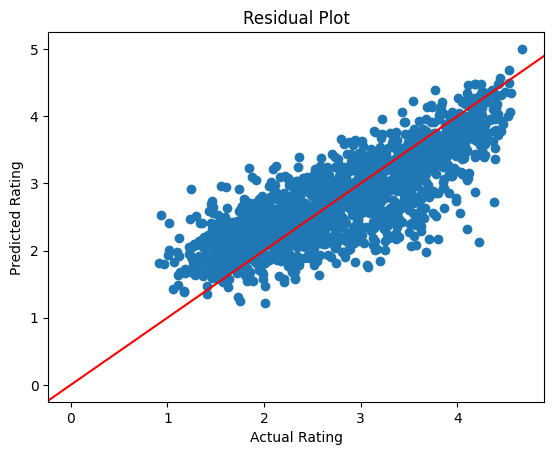

In [46]:
# Plotting the residuals
plt.scatter(y_test_log, y_lassocv_pred)
plt.axline([0, 0], slope=1, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Residual Plot')

#### Ridge Regression

In [47]:
# Setting the alphas
alphas = np.logspace(-3, 3, 13)

# Fitting the RidgeCV model
ridge_cv = RidgeCV(alphas=alphas, cv=3)
ridge_cv.fit(X_train_log, y_train_log)

# Making predictions
y_ridgecv_pred = np.clip(ridge_cv.predict(X_test_log), 0, 5)

# Printing the coefficients
print('Coefficients:', ridge_cv.coef_)

# Printing the intercept
print('Intercept:', ridge_cv.intercept_)

# Printing the training R-squared score
ridge_cv_r2_train = r2_score(y_train_log, ridge_cv.predict(X_train_log))
print('Training R-squared score:', ridge_cv_r2_train)

# Printing the testing R-squared score
ridge_cv_r2_test = r2_score(y_test_log, y_ridgecv_pred)
print('Test R-squared score:', ridge_cv_r2_test)

# Printing the training RMSE score
ridge_cv_rmse_train = np.sqrt(mean_squared_error(y_train_log, ridge_cv.predict(X_train_log)))
print('Training RMSE:', ridge_cv_rmse_train)

# Printing the testing RMSE score
ridge_cv_rmse_test = np.sqrt(mean_squared_error(y_test_log, y_ridgecv_pred))
print('Test RMSE:', ridge_cv_rmse_test)

Coefficients: [ 1.30692428e-01  2.69794451e-01  1.48728366e-01  8.25884437e-03
 -4.96732450e-04 -6.99333324e-02  1.00465721e-01  3.26785885e-01
  3.48863217e-01 -5.10369836e-01  1.39189131e-01  3.63933038e-02
  9.53299158e-03 -8.06974919e-03  1.56665259e-02 -2.23793625e-03
  2.56542832e-02 -2.08203474e-02  1.68953362e-02  5.36432261e-02
  3.35663527e-03 -1.05240979e-03 -3.87708581e-02  6.96568443e-03
 -1.47928671e-03 -1.48647093e-02  4.31412676e-02  1.30993448e-02
  2.08414429e-02 -1.70154565e-03 -1.35069441e-02 -5.30932839e-02
  8.22250437e-03  1.62961540e-02 -1.12713148e-02 -1.29658808e-02
  8.17227587e-03 -8.92905169e-04 -7.29831016e-02  2.34555451e-01
 -1.72445839e-01  7.74447060e-02 -2.34806059e-01 -3.91451964e-02
  1.77767878e-02  2.31706384e-02 -1.33185607e-01  9.64291471e-02
 -2.86817917e-01 -5.79575292e-02 -1.29150066e-01  1.23113415e-02
  5.69935144e-02  1.65803907e-01 -2.39976176e-01 -5.71301275e-02
  1.05518705e-01  9.55872087e-02  1.38838730e-01  9.99852142e-02
 -4.3493701

Text(0.5, 1.0, 'Residual Plot')

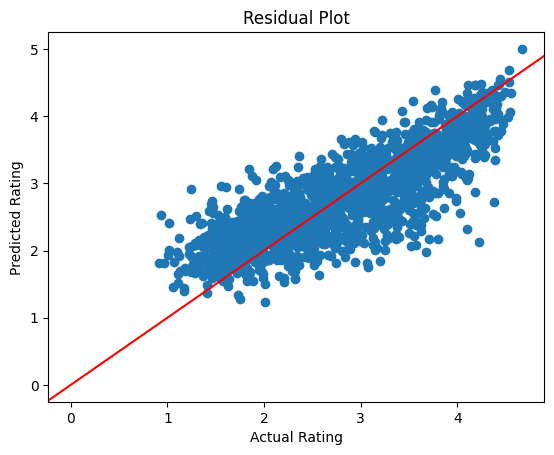

In [48]:
# Plotting the residuals
plt.scatter(y_test_log, y_ridgecv_pred)
plt.axline([0, 0], slope=1, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Residual Plot')

#### ElasticNetCV

In [50]:
# Initiating an instance of ElasticNetCV
en_cv = ElasticNetCV(cv=3, l1_ratio=np.linspace(0.1, 1.0, 10), alphas=np.logspace(-3, 3, 13), max_iter=10000, random_state=42)

# Fitting the ElasticNetCV model
en_cv.fit(X_train_log, y_train_log)

# Making predictions
y_encv_pred = np.clip(en_cv.predict(X_test_log), 0, 5)

# Printing the coefficients
print('Coefficients:', en_cv.coef_)

# Printing the intercept
print('Intercept:', en_cv.intercept_)

# Printing the training R-squared score
en_cv_r2_train = r2_score(y_train_log, en_cv.predict(X_train_log))
print('Training R-squared score:', en_cv_r2_train)

# Printing the testing R-square score
en_cv_r2_test = r2_score(y_test_log, y_encv_pred)
print('Test R-squared score:', en_cv_r2_test)

# Printing the training RMSE score
en_cv_rmse_train = np.sqrt(mean_squared_error(y_train_log, en_cv.predict(X_train_log)))
print('Training RMSE:', en_cv_rmse_train)

# Printing the testing RMSE score
en_cv_rmse_test = np.sqrt(mean_squared_error(y_test_log, y_encv_pred))
print('Test RMSE:', en_cv_rmse_test)

Coefficients: [ 1.31217338e-01  2.70116476e-01  1.50892205e-01  7.88060348e-03
 -2.92283660e-04 -6.98265031e-02  9.70800492e-02  3.28352222e-01
  3.50757889e-01 -5.12825192e-01  1.41869292e-01  3.59973721e-02
  9.72723721e-03 -8.09966576e-03  1.55796605e-02 -2.09648525e-03
  2.56061024e-02 -2.07210156e-02  1.65626056e-02  5.35569434e-02
  3.15874646e-03 -6.43705783e-04 -3.77842239e-02  6.84697269e-03
 -1.38336401e-03 -1.41092810e-02  4.30042854e-02  1.30873469e-02
  2.06605945e-02 -1.75362738e-03 -1.31799565e-02 -5.29751268e-02
  8.16778171e-03  1.61637659e-02 -1.10913738e-02 -1.28929148e-02
  8.08873542e-03 -8.28816055e-04 -7.48017816e-02  2.34740384e-01
 -1.74011717e-01  7.52155202e-02 -2.39022578e-01 -3.90437393e-02
  1.44553691e-02  7.52035949e-03 -1.38736965e-01  8.67297688e-02
 -2.99299332e-01 -5.53274271e-02 -1.34851797e-01  0.00000000e+00
  4.87203422e-02  1.64873733e-01 -2.52403414e-01 -6.32159394e-02
  9.85032118e-02  8.62429701e-02  1.34555652e-01  9.23161648e-02
 -4.4469396

Text(0.5, 1.0, 'Residual Plot')

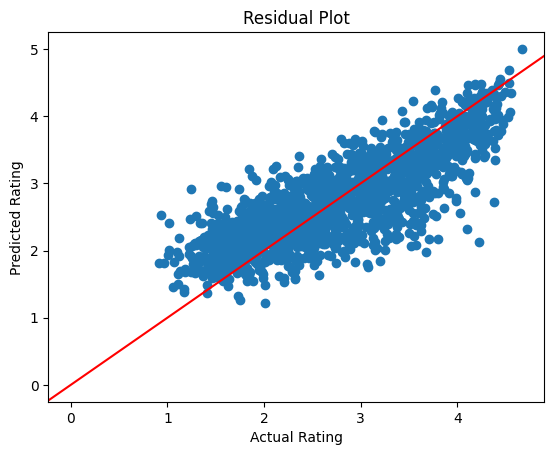

In [51]:
# Plotting the residuals
plt.scatter(y_test_log, y_encv_pred)
plt.axline([0, 0], slope=1, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Residual Plot')

## Model Evaluation

In [59]:
# Creating a dataframe of all of our test scores and their corresponding labels
scores_df = pd.DataFrame({"Model": ["Linear Regression", "Linear Regression w/ Log Variables", "LassoCV", "RidgeCV", "ElasticNetCV"],
                          "Training R-squared": [lr_r2_train, lr_log_r2_train, lasso_cv_r2_train, ridge_cv_r2_train, en_cv_r2_train],
                          "Test R-squared": [lr_r2_test, lr_log_r2_test, lasso_cv_r2_test, ridge_cv_r2_test, en_cv_r2_test],
                          "R2 Diff": [lr_r2_train - lr_r2_test, lr_log_r2_train - lr_log_r2_test, lasso_cv_r2_train - lasso_cv_r2_test, ridge_cv_r2_train - ridge_cv_r2_test, en_cv_r2_train - en_cv_r2_test],
                          "Training RMSE": [lr_rmse_train, lr_log_rmse_train, lasso_cv_rmse_train, ridge_cv_rmse_train, en_cv_rmse_train],
                          "Test RMSE": [lr_rmse_test, lr_log_rmse_test, lasso_cv_rmse_test, ridge_cv_rmse_test, en_cv_rmse_test],
                          "RMSE Diff": [lr_rmse_train - lr_rmse_test, lr_log_rmse_train - lr_log_rmse_test, lasso_cv_rmse_train - lasso_cv_rmse_test, ridge_cv_rmse_train - ridge_cv_rmse_test, en_cv_rmse_train - en_cv_rmse_test]})

scores_df.T

,0,1,2,3,4
Model,Linear Regression,Linear Regression w/ Log Variables,LassoCV,RidgeCV,ElasticNetCV
Training R-squared,0.525657,0.659156,0.65911,0.658987,0.659
Test R-squared,0.516978,0.644501,0.644556,0.644704,0.644655
R2 Diff,0.008679,0.014654,0.014555,0.014283,0.014345
Training RMSE,0.568299,0.481736,0.481768,0.481855,0.481846
Test RMSE,0.588642,0.504995,0.504956,0.504851,0.504885
RMSE Diff,-0.020343,-0.023259,-0.023188,-0.022996,-0.02304


* RidgeCV performed best in terms of both R2 score and RMSE, and it was also the least overfit of all of our models. We'll choose RidgeCV as our final model selection.

# Gathering Further Insights

In [63]:
# Adjusting the settings to show all rows
pd.set_option('display.max_rows', None)

# Getting the names of all of the features and their corresponding coefficients to determine the features that play the biggest roles in determining the predictions
feature_names = X_train_log.columns
coefficients = ridge_cv.coef_
df_coefficients = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
df_coefficients = df_coefficients.sort_values(by="Coefficient", ascending=False)

# Displaying the top 5 positively correlated features
df_coefficients.head()

,Feature,Coefficient
8,wantWatch,0.348863
7,watching,0.326786
1,duration,0.269794
39,mediaType_Music Video,0.234555
62,studio_primary_TMS Entertainment,0.196277


In [64]:
# Displaying the top 5 negatively correlated features
df_coefficients.tail()

,Feature,Coefficient
40,mediaType_OVA,-0.172446
42,mediaType_TV,-0.234806
54,studio_primary_OLM,-0.239976
48,studio_primary_DLE,-0.286818
9,dropped,-0.510370


In [66]:
# Displaying the top 5 tags
df_coefficients[df_coefficients['Feature'].str.contains('tag', case=False)].head()

,Feature,Coefficient
19,tag_Drama,0.053643
26,tag_Slice_of_Life,0.043141
11,tag_Based_on_a_Manga,0.036393
16,tag_Shounen,0.025654
28,tag_Supernatural,0.020841


In [67]:
# Displaying the bottom 5 tags
df_coefficients[df_coefficients['Feature'].str.contains('tag', case=False)].tail()

,Feature,Coefficient
30,tag_Animal_Protagonists,-0.013507
25,tag_Shorts,-0.014865
17,tag_Original_Work,-0.020820
22,tag_Short_Episodes,-0.038771
31,tag_Ecchi,-0.053093


In [68]:
# Displaying the top 5 studios
df_coefficients[df_coefficients['Feature'].str.contains('studio', case=False)].head()

,Feature,Coefficient
62,studio_primary_TMS Entertainment,0.196277
53,studio_primary_Nippon Animation,0.165804
58,studio_primary_Shin-Ei Animation,0.138839
56,studio_primary_Production I.G,0.105519
59,studio_primary_Studio Deen,0.099985


In [69]:
# Displaying the bottom 5 studios
df_coefficients[df_coefficients['Feature'].str.contains('studio', case=False)].tail()

,Feature,Coefficient
66,studio_primary_is_missing,-0.106525
50,studio_primary_J.C. Staff,-0.129150
46,studio_primary_AIC,-0.133186
54,studio_primary_OLM,-0.239976
48,studio_primary_DLE,-0.286818


In [70]:
# Displaying top 5 media types
df_coefficients[df_coefficients['Feature'].str.contains('mediaType', case=False)].head()

,Feature,Coefficient
39,mediaType_Music Video,0.234555
41,mediaType_Other,0.077445
45,mediaType_is_missing,0.023171
44,mediaType_Web,0.017777
43,mediaType_TV Special,-0.039145


In [71]:
# Displaying bottom 5 media types
df_coefficients[df_coefficients['Feature'].str.contains('mediaType', case=False)].tail()

,Feature,Coefficient
44,mediaType_Web,0.017777
43,mediaType_TV Special,-0.039145
38,mediaType_Movie,-0.072983
40,mediaType_OVA,-0.172446
42,mediaType_TV,-0.234806


In [91]:
# Displaying all coefficients
df_coefficients

,Feature,Coefficient
8,wantWatch,0.348863
7,watching,0.326786
1,duration,0.269794
39,mediaType_Music Video,0.234555
62,studio_primary_TMS Entertainment,0.196277
53,studio_primary_Nippon Animation,0.165804
2,ongoing,0.148728
10,votes,0.139189
58,studio_primary_Shin-Ei Animation,0.138839
0,eps,0.130692
